In [4]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

trainset = torchvision.datasets.CIFAR10(root = './data', train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=True, num_workers=2)

Using downloaded and verified file: ./data\cifar-10-python.tar.gz
Files already downloaded and verified


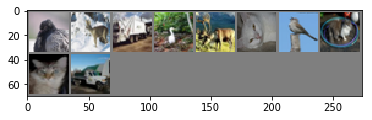

In [6]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def imshow(img):
    img = img / 2 + 0.5
    nping = img.numpy()
    nping = np.transpose(nping, (1, 2, 0))
    plt.imshow(nping)

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

In [7]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):                # 定义网络结构 输入数据 3*32*32
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(3, 6, 3) # 输入频道 1 输出平道 6 卷积 3*3
        self.conv2 = nn.Conv2d(6, 16, 3) # 输入频道 1 输出平道 6 卷积 3*3
        self.fc1 = nn.Linear(16*28*28, 512)  # 思考why 28
        self.fc2 = nn.Linear(512, 64)  # 输入 512 输出 64
        self.fc3 = nn.Linear(64, 10)    # 输入64， 输出2

    def forward(self, x):              # 定义数据流向
        x = self.conv1(x)
        x = F.relu(x)

        x = self.conv2(x)
        x = F.relu(x)

        x = x.view(-1, 16*28*28)
        x = self.fc1(x)
        x = F.relu(x)

        x = self.fc2(x)
        x = F.relu(x)

        x = self.fc3(x)

        return x

In [8]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=12544, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [10]:
for epoch in range(2):
    for i, data in enumerate(trainloader):
        images, labels = data
        outputs = net(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if(i % 1000 == 0):
            print('Epoch: %d, Step: %d, Loss: %.3f' %(epoch, i, loss.item()))

Epoch: 0, Step: 0, Loss: 2.305
Epoch: 0, Step: 1000, Loss: 2.088
Epoch: 0, Step: 2000, Loss: 1.681
Epoch: 0, Step: 3000, Loss: 1.485
Epoch: 0, Step: 4000, Loss: 0.861
Epoch: 1, Step: 0, Loss: 1.549
Epoch: 1, Step: 1000, Loss: 1.965
Epoch: 1, Step: 2000, Loss: 1.620
Epoch: 1, Step: 3000, Loss: 0.970
Epoch: 1, Step: 4000, Loss: 1.186


In [11]:
# 测试模型

correct = 0.0
total = 0.0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)

        correct += (predicted == labels).sum()
        total += labels.size(0)
    
print('准确率：', float(correct) / total)

准确率： 0.5249


In [ ]:
# 保存模型
torch.save(net.state_dict(), './model.pt')

# 读取模型
net_2 = Net()

net_2.load_state_dict(torch.load(./model.pt))